# Spam Message Classification 📊

## 1. Introduction

### Overview of the problem (spam classification)

### Description of the dataset

## 2. Data Loading & Preprocessing

### Load necessary libraries

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Download and load the dataset

In [130]:
url = "https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/download"
df = pd.read_csv("spam.csv", encoding='latin-1')
df = df.iloc[:, :2]
df.columns = ['label', 'message']

FileNotFoundError: [Errno 2] No such file or directory: 'spam.csv'

### Tokenization and vectorization

### Train-test split

In [118]:
# Load the Reuters dataset
(train_data, train_labels), (test_data, test_labels) = keras.datasets.reuters.load_data(num_words=10_000)

In [119]:
# Print dataset details
print(f"Training samples: {len(train_data)}, Test samples: {len(test_data)}")
print(f"Number of classes: {np.max(train_labels) + 1}") 

Training samples: 8982, Test samples: 2246
Number of classes: 46


In [120]:
# Decode a sample article
word_index = keras.datasets.reuters.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

print("\nSample article (decoded):\n", decoded_review)


Sample article (decoded):
 ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [121]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [122]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [123]:
# One-hot encode the labels for 46-class classification
train_labels = to_categorical(train_labels, num_classes=46)
test_labels = to_categorical(test_labels, num_classes=46)

In [124]:
# Build a simple Dense-based model
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))


In [125]:
# Compile the model
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Print model summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                640064    
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 dense_32 (Dense)            (None, 46)                2990      
                                                                 
Total params: 647214 (2.47 MB)
Trainable params: 647214 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [126]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = train_labels[:1000]
partial_y_train = train_labels[1000:]

In [127]:
# Train the model
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 10,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 33ms/step - loss: 2.4879 - accuracy: 0.5474 - val_loss: 1.7266 - val_accuracy: 0.6510
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.3913 - accuracy: 0.7146 - val_loss: 1.2993 - val_accuracy: 0.7060
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0167 - accuracy: 0.7859 - val_loss: 1.1298 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.7965 - accuracy: 0.8389 - val_loss: 1.0837 - val_accuracy: 0.7560
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.6323 - accuracy: 0.8742 - val_loss: 0.9788 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5052 - accuracy: 0.9002 - val_loss: 0.9752 - val_accuracy: 0.7900
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4084 - accuracy: 0.9209 - val_loss: 0.9105 - val_accuracy: 0.8160
Epoch 8/20
16

In [128]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

71/71 [==============================] - 1s 8ms/step - loss: 1.3037 - accuracy: 0.7787

Test accuracy: 0.7787


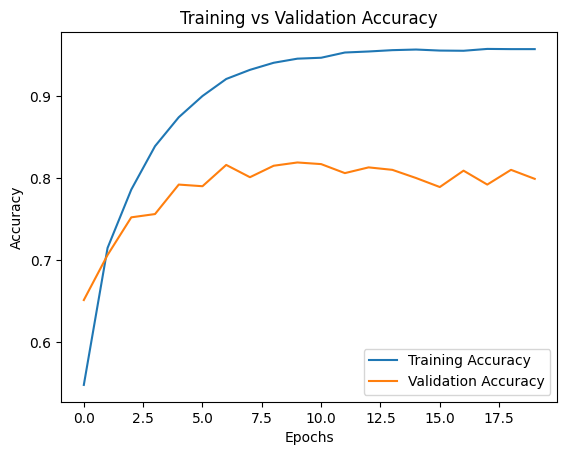

In [129]:
# Plot training history
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()